In [1]:
import numpy as np
import pandas as pd
from scipy.stats import f
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set(color_codes=True)
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power

# Wholesale_Customers_Data

In [2]:
wcd = pd.read_csv('Wholesale+Customers+Data.csv')
wcd.head(10)

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
5,6,Retail,Other,9413,8259,5126,666,1795,1451
6,7,Retail,Other,12126,3199,6975,480,3140,545
7,8,Retail,Other,7579,4956,9426,1669,3321,2566
8,9,Hotel,Other,5963,3648,6192,425,1716,750
9,10,Retail,Other,6006,11093,18881,1159,7425,2098


In [3]:
wcd.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

# 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [4]:
wcd.describe().T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,220.500000,127.161315,1.0,110.75,220.5,330.25,440.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [5]:
wcd["Region"].value_counts()

Other     316
Lisbon     77
Oporto     47
Name: Region, dtype: int64

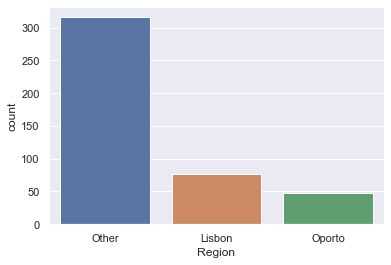

In [6]:
sns.countplot(wcd["Region"]);

In [7]:
wcd["Channel"].value_counts()

Hotel     298
Retail    142
Name: Channel, dtype: int64

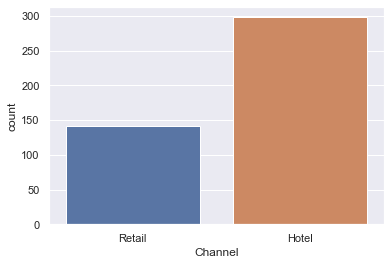

In [8]:
sns.countplot(wcd["Channel"]);

# 1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.¶

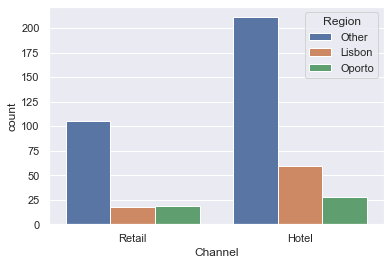

In [9]:
sns.countplot(x="Channel", hue="Region", data=wcd);

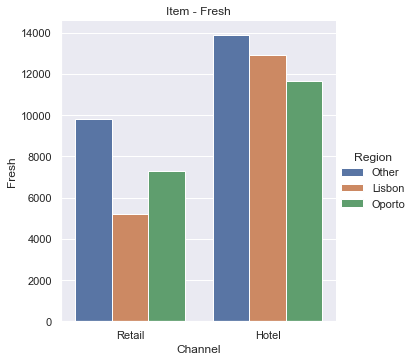

In [10]:
sns.catplot(x="Channel", y="Fresh", hue ="Region", kind="bar",ci=None, data=wcd)
plt.title('Item - Fresh');

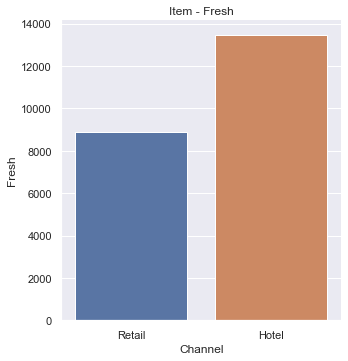

In [11]:
sns.catplot(x="Channel", y="Fresh",kind="bar",ci=None, data=wcd)
plt.title('Item - Fresh');

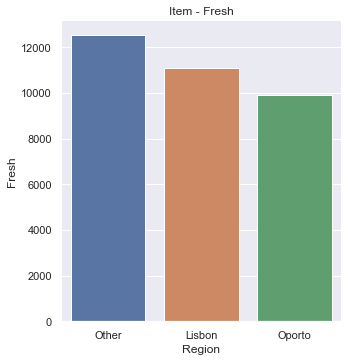

In [12]:
sns.catplot(x="Region", y="Fresh",kind="bar",ci=None, data=wcd)
plt.title('Item - Fresh');

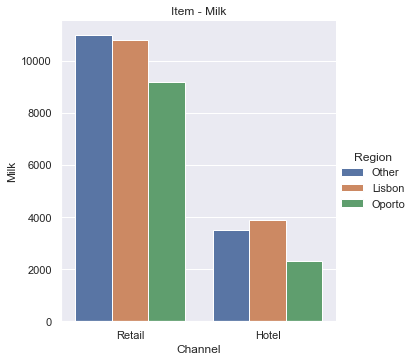

In [13]:
sns.catplot(x="Channel", y="Milk",hue = "Region", kind="bar",ci=None, data=wcd)
plt.title('Item - Milk');

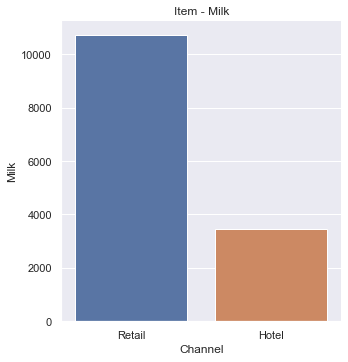

In [14]:
sns.catplot(x="Channel", y="Milk",kind="bar",ci=None, data=wcd)
plt.title('Item - Milk');

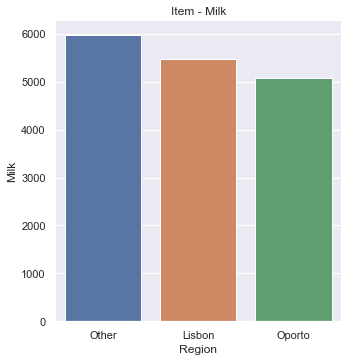

In [15]:
sns.catplot(x="Region", y="Milk",kind="bar",ci=None, data=wcd)
plt.title('Item - Milk');

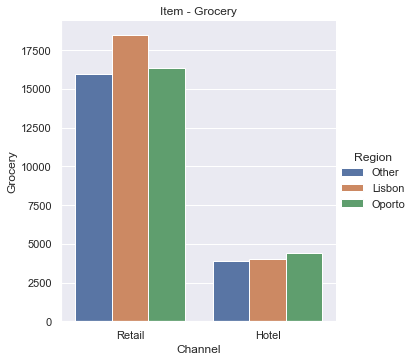

In [16]:
sns.catplot(x="Channel", y="Grocery",hue = "Region", kind="bar",ci=None, data=wcd)
plt.title('Item - Grocery');

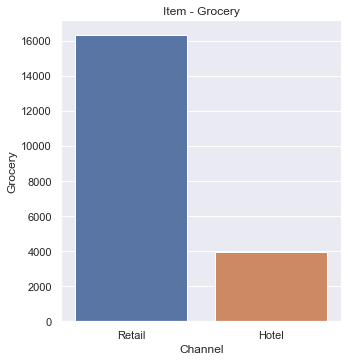

In [17]:
sns.catplot(x="Channel", y="Grocery",kind="bar",ci=None, data=wcd)
plt.title('Item - Grocery');

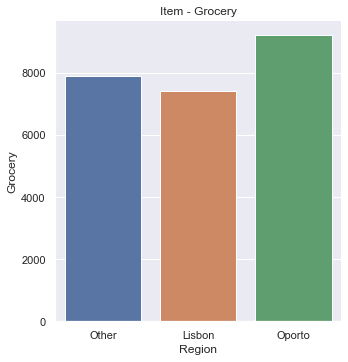

In [18]:
sns.catplot(x="Region", y="Grocery",kind="bar",ci=None, data=wcd)
plt.title('Item - Grocery');

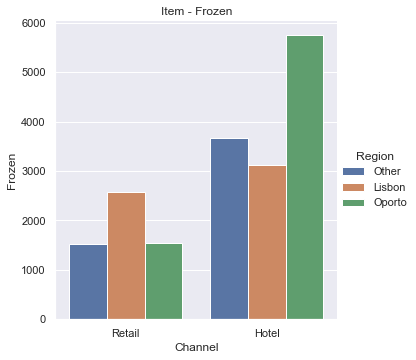

In [19]:
sns.catplot(x="Channel", y="Frozen",hue = "Region", kind="bar",ci=None, data=wcd)
plt.title('Item - Frozen');

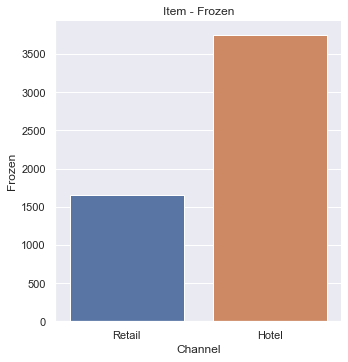

In [20]:
sns.catplot(x="Channel", y="Frozen",kind="bar",ci=None, data=wcd)
plt.title('Item - Frozen');

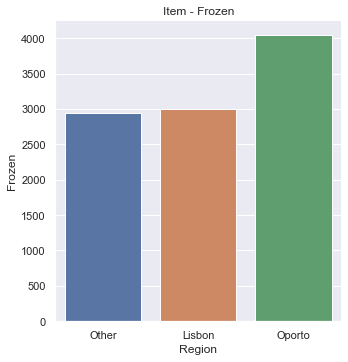

In [92]:
sns.catplot(x="Region", y="Frozen",kind="bar",ci=None, data=wcd)
plt.title('Item - Frozen');

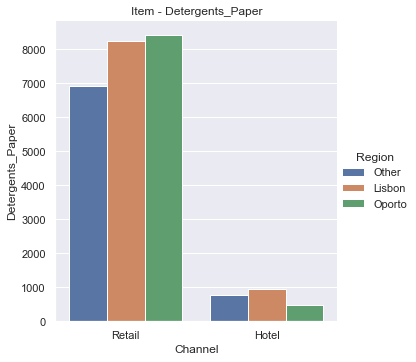

In [22]:
sns.catplot(x="Channel", y="Detergents_Paper",hue = "Region", kind="bar",ci=None, data=wcd)
plt.title('Item - Detergents_Paper');

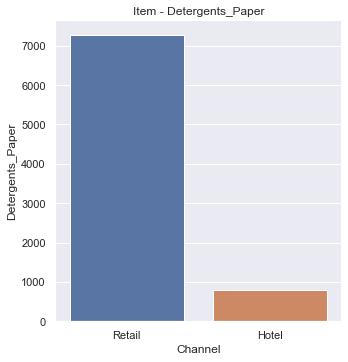

In [23]:
sns.catplot(x="Channel", y="Detergents_Paper", kind="bar",ci=None, data=wcd)
plt.title('Item - Detergents_Paper');

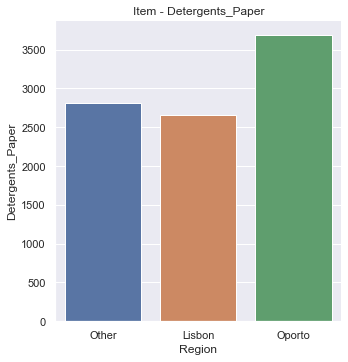

In [24]:
sns.catplot(x="Region", y="Detergents_Paper", kind="bar",ci=None, data=wcd)
plt.title('Item - Detergents_Paper');

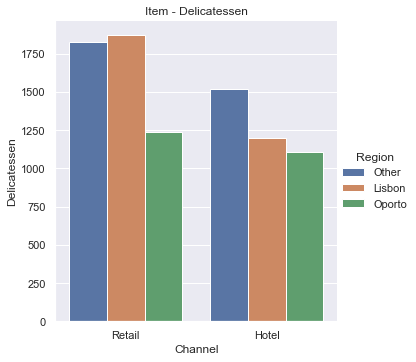

In [25]:
sns.catplot(x="Channel", y="Delicatessen",hue = "Region", kind="bar",ci=None, data=wcd)
plt.title('Item - Delicatessen');

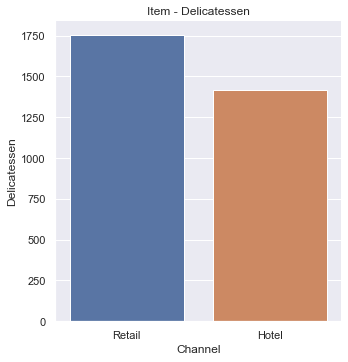

In [26]:
sns.catplot(x="Channel", y="Delicatessen", kind="bar",ci=None, data=wcd)
plt.title('Item - Delicatessen');

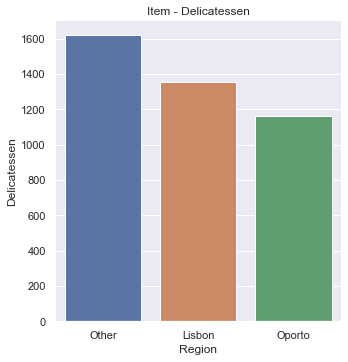

In [27]:
sns.catplot(x="Region", y="Delicatessen",kind="bar",ci=None, data=wcd)
plt.title('Item - Delicatessen');

# 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [28]:
wcd.iloc[:,3:9,].std()

Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
dtype: float64

In [29]:
wcd.iloc[:,3:9,].mean()

Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
dtype: float64

##Fresh item have highest Standard deviation So that is Inconsistent.
 Delicatessen item have smallest Standard deviation, So that is consistent.


In [94]:
## Based on coeffiecent of Variation:

In [30]:
Fresh = np.std(wcd['Fresh']) / np.mean(wcd['Fresh'])
Fresh

1.0527196084948245

In [31]:
Milk = np.std(wcd['Milk']) / np.mean(wcd['Milk'])
Milk

1.2718508307424503

In [32]:
Grocery =  np.std(wcd['Grocery']) / np.mean(wcd['Grocery'])
Grocery

1.193815447749267

In [33]:
Frozen = np.std(wcd['Frozen']) / np.mean(wcd['Frozen'])
Frozen

1.5785355298607762

In [34]:
Detergents_Paper = np.std(wcd['Detergents_Paper']) / np.mean(wcd['Detergents_Paper'])
Detergents_Paper

1.6527657881041729

In [35]:
Delicatessen = np.std(wcd['Delicatessen']) / np.mean(wcd['Delicatessen'])
Delicatessen

1.8473041039189306

In [36]:
wcd.iloc[:,3:9,].var()

Fresh               1.599549e+08
Milk                5.446997e+07
Grocery             9.031010e+07
Frozen              2.356785e+07
Detergents_Paper    2.273244e+07
Delicatessen        7.952997e+06
dtype: float64

# 1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

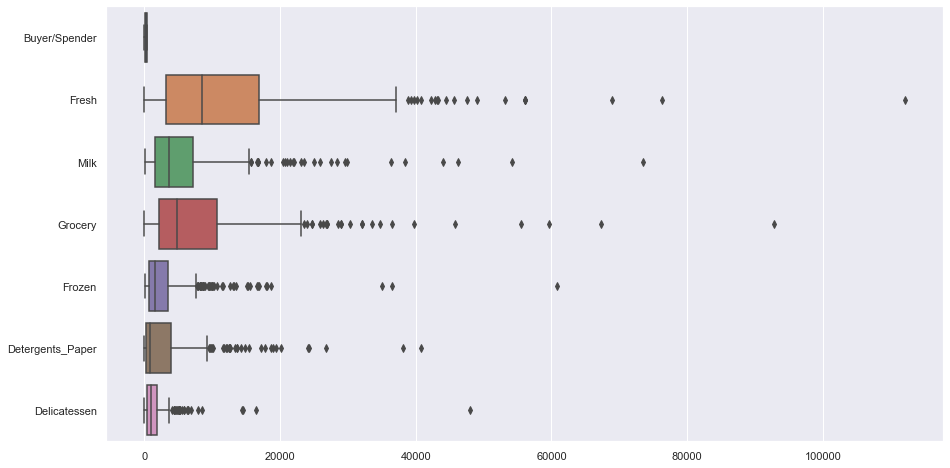

In [37]:
plt.figure(figsize=(15,8))
sns.boxplot(data=wcd, orient="h");

## Yes there are Outlier's in the data

# 1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective

###SO on the basis of my analysis i can observe that there is a lot of inconsistency in the business as we can observe there are outlier's in the dataset. So there are fews reason for it that is Mistakes,Lack of knowledge and Human nature. So, if the person who own the business have made a mistake in predecting the model of the business so i would suggest him to have a look on his business model and if he had lack of knowledge about the region's,channel and his item then as of now i have cleared it through my anylysis that where the business is lacking and the main this that should be done is improve the business model with the given information.
AS we can see the most inconsistent are Fresh,grocery,milk and frozen these items have the most outlier's this clearly is the mistake of the person who own's the business as he didn't properly plan his business according to the condition of the market.


# Survey

In [38]:
df1 = pd.read_csv('Survey.csv')
df1.head(10)

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
5,6,Female,22,Senior,Economics/Finance,Undecided,2.3,Unemployed,78.0,3,2,700,Laptop,30
6,7,Female,21,Junior,Other,Undecided,3.0,Part-Time,50.0,1,3,500,Laptop,50
7,8,Female,22,Senior,Other,Undecided,3.1,Full-Time,80.0,1,2,200,Tablet,300
8,9,Female,20,Junior,Management,Yes,3.6,Unemployed,30.0,0,4,500,Laptop,400
9,10,Female,21,Senior,Economics/Finance,Undecided,3.3,Part-Time,37.5,1,4,200,Laptop,100


In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [40]:
df1.isnull().sum()

ID                   0
Gender               0
Age                  0
Class                0
Major                0
Grad Intention       0
GPA                  0
Employment           0
Salary               0
Social Networking    0
Satisfaction         0
Spending             0
Computer             0
Text Messages        0
dtype: int64

In [41]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,62.0,31.500000,18.041619,1.0,16.25,31.50,46.75,62.0
Age,62.0,21.129032,1.431311,18.0,20.00,21.00,22.00,26.0
GPA,62.0,3.129032,0.377388,2.3,2.90,3.15,3.40,3.9
Salary,62.0,48.548387,12.080912,25.0,40.00,50.00,55.00,80.0
Social Networking,62.0,1.516129,0.844305,0.0,1.00,1.00,2.00,4.0
Satisfaction,62.0,3.741935,1.213793,1.0,3.00,4.00,4.00,6.0
Spending,62.0,482.016129,221.953805,100.0,312.50,500.00,600.00,1400.0
Text Messages,62.0,246.209677,214.465950,0.0,100.00,200.00,300.00,900.0


# 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

2.1.1. Gender and Major

2.1.2. Gender and Grad Intention

2.1.3. Gender and Employment

2.1.4. Gender and Computer


In [42]:
pd.crosstab(df1['Gender'],df1['Major'],margins=True)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [43]:
pd.crosstab(df1['Gender'],df1['Grad Intention'],margins=True)

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [44]:
pd.crosstab(df1['Gender'],df1['Employment'],margins=True)

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


In [45]:
pd.crosstab(df1['Gender'],df1['Computer'],margins=True)

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


# 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.2.1. What is the probability that a randomly selected CMSU student will be male?

2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [46]:
df1['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [93]:
print('Probability that a randomly selected candidate of CSMU will be male:',29/len(df1['Gender']))

Probability that a randomly selected candidate of CSMU will be male: 0.46774193548387094


In [47]:
print('Probability that a randomly selected candidate of CMSU will be Female:',33/len(df1['Gender']))

Probability that a randomly selected candidate of CMSU will be Female: 0.532258064516129


# 2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.3.1. Find the conditional probability of different majors among the male students in CMSU.

2.3.2 Find the conditional probability of different majors among the female students of CMSU.

P (Major's | male) = P (Major's ∩ male)/ P(male)

P (Accounting | male ) = P (Accounting ∩ male)/P(male)
                       = 4/29
                       = 0.14

P (CIS | male ) = P (CIS ∩ male)/P(male)
                = 1/29
                = 0.03
                
P (Economics/Finance | male ) = P (Economics/Finance ∩ male)/P(male)
                              = 4/29
                              = 0.18
                              
P (International Business | male ) = P (International Business ∩ male)/P(male)
                                   = 2/29
                                   = 0.07
                                   
P (Management | male ) = P (Management ∩ male)/P(male)
                                   = 6/29
                                   = 0.21
                                   
P (Other | male ) = P (Other ∩ male)/P(male)
                                   = 4/29
                                   = 0.14
                                   
P (Retailing/Marketing | male ) = P (Retailing/Marketing ∩ male)/P(male)
                                   = 5/29
                                   = 0.17

P (Major's | Female) = P (Major's ∩ Female)/ P(Female)
                     = 33/33
                     = 1.0

P (Accounting | Female) = P (Accounting ∩ Female)/ P(Female)
                     = 3/33
                     = 0.09
                    
P (CIS | Female) = P (CIS ∩ Female)/ P(Female)
                     = 3/33
                     = 0.09
                     
P (Economics/Finance | Female) = P (Economics/Finance ∩ Female)/ P(Female)
                     = 7/33
                     = 0.21
                     
P (International Business | Female) = P (International Business ∩ Female)/ P(Female)
                     = 4/33
                     = 0.12
                     
P (Management | Female) = P (Management ∩ Female)/ P(Female)
                     = 4/33
                     = 0.12
                     
P (Other | Female) = P (Other ∩ Female)/ P(Female)
                     = 3/33
                     = 0.09
                     
P (Retailing/Marketing | Female) = P (Retailing/Marketing ∩ Female)/ P(Female)
                     = 9/33
                     = 0.27                     

In [49]:
print('Among MALE candidates:')
print('Probability of different majors among the male students in CMSU. :',26/29)
print('Probability of Male Students in Accounting is :',4/29)
print('Probability of Male Students in CIS is :',1/29)
print('Probability of Male Students in Economics/Finance is :',4/29)
print('Probability of Male Students in International Business is :',2/29)
print('Probability of Male Students in Management is :',6/29)
print('Probability of Male Students in Other is :',4/29)
print('Probability of Male Students in Retailing/Marketing is :',5/29)
print()
print('Among FEMALE candidates:')
print('Probability of different majors among the Female students in CMSU. :',33/33)
print('Probability of Female Students in Accounting is :',3/33)
print('Probability of Female Students in CIS is :',3/33)
print('Probability of Female Students in Economics/Finance is :',7/33)
print('Probability of Female Students in International Business is :',4/33)
print('Probability of Female Students in Management is :',4/33)
print('Probability of Female Students in Other is :',3/33)
print('Probability of Female Students in Retailing/Marketing is :',9/33)

Among MALE candidates:
Probability of different majors among the male students in CMSU. : 0.896551724137931
Probability of Male Students in Accounting is : 0.13793103448275862
Probability of Male Students in CIS is : 0.034482758620689655
Probability of Male Students in Economics/Finance is : 0.13793103448275862
Probability of Male Students in International Business is : 0.06896551724137931
Probability of Male Students in Management is : 0.20689655172413793
Probability of Male Students in Other is : 0.13793103448275862
Probability of Male Students in Retailing/Marketing is : 0.1724137931034483

Among FEMALE candidates:
Probability of different majors among the Female students in CMSU. : 1.0
Probability of Female Students in Accounting is : 0.09090909090909091
Probability of Female Students in CIS is : 0.09090909090909091
Probability of Female Students in Economics/Finance is : 0.21212121212121213
Probability of Female Students in International Business is : 0.12121212121212122
Probabili

# 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 

P (Intend's to graduate | male) = P (Intend's to graduate ∩ male)/ P(male)
                                = 17/29
                                = 0.59

P (Not have a laptop | male) = P (Not have a laptop ∩ male)/ P(male) = 4/33 = 0.12

In [50]:
print('Probability of a randomly chosen student is a male and intends to graduate is :',17/29)

Probability of a randomly chosen student is a male and intends to graduate is : 0.5862068965517241


In [51]:
print('Probability of a randomly selected student is a female and does NOT have a laptop. is :',4/33)

Probability of a randomly selected student is a female and does NOT have a laptop. is : 0.12121212121212122


# 2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?

2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

P (full-time employment | male) = P (full-time employment ∩ male)/ P(male) = 7/29 = 0.24

In [52]:
print('Among MALE candidates:')
print('Probability that a randomly chosen student is a male or has full-time employment is :',7/29)

Among MALE candidates:
Probability that a randomly chosen student is a male or has full-time employment is : 0.2413793103448276


P (Major(international business or management) | female) = P (Major(international business or management)∩ female)/ P(female)
                                                         = 8/33
                                                         = 0.24

In [53]:
print('Among FEMALE candidates:')
print('Probability that given a female student is majoring in international business or management is :',8/33)

Among FEMALE candidates:
Probability that given a female student is majoring in international business or management is : 0.24242424242424243


# 2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [54]:
df2=pd.crosstab(index=df1['Gender'], columns=df1['Grad Intention'],margins=True)
df2

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [55]:
df2.loc[['Female','Male'],['Yes','No']]

Grad Intention,Yes,No
Gender,,
Female,11,9
Male,17,3


# 2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

Answer the following questions based on the data

2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.


In [56]:
pd.crosstab(df1['Gender'],df1['GPA'],margins=True)

GPA,2.3,2.4,2.5,2.6,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,All
Gender,,,,,,,,,,,,,,,,,
Female,1,1,2,0,1,3,5,2,4,3,2,4,1,2,1,1,33
Male,0,0,4,2,2,1,2,5,2,2,5,2,2,0,0,0,29
All,1,1,6,2,3,4,7,7,6,5,7,6,3,2,1,1,62


In [57]:
print('Probability that his/her GPA is less than 3  is :',17/62)

Probability that his/her GPA is less than 3  is : 0.27419354838709675


In [58]:
pd.crosstab(df1['Gender'],df1['Salary'],margins=True)

Salary,25.0,30.0,35.0,37.0,37.5,40.0,42.0,45.0,47.0,47.5,50.0,52.0,54.0,55.0,60.0,65.0,70.0,78.0,80.0,All
Gender,,,,,,,,,,,,,,,,,,,,
Female,0,5,1,0,1,5,1,1,0,1,5,0,0,5,5,0,1,1,1,33
Male,1,0,1,1,0,7,0,4,1,0,4,1,1,3,3,1,0,0,1,29
All,1,5,2,1,1,12,1,5,1,1,9,1,1,8,8,1,1,1,2,62


P (Earns 50 or more | Male) = P (Earns 50 or more | Male)/ P(Male)

P (Earns 50 or more | Female) = P (Earns 50 or more | Female)/ P(Female)

In [59]:
print(' conditional probability that a randomly selected male earns 50 or more is :',14/29)

 conditional probability that a randomly selected male earns 50 or more is : 0.4827586206896552


In [60]:
print(' conditional probability that a randomly selected Female earns 50 or more is :',18/33)

 conditional probability that a randomly selected Female earns 50 or more is : 0.5454545454545454


# 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

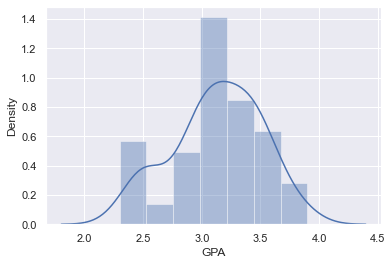

In [61]:
sns.distplot(df1['GPA'],kde=True);

In [62]:
m = df1['GPA'].mean()
m

3.129032258064516

In [63]:
df1['GPA'].median()

3.1500000000000004

In [64]:
sd = df1['GPA'].std()
sd

0.3773883926969118

In [65]:
df1['GPA'].mode()

0    3.0
1    3.1
2    3.4
dtype: float64

##So, here we can see that the mean is 3.13 so as we know to be considered a normal distribution, a data set (when graphed) must follow a bell-shaped symmetrical curve centered around the mean but we can see here that the curve is lightly toward's the right and we can see that most of the point's are coming between 3.0 - 3.5 hence it doesn't follow normal distribution.

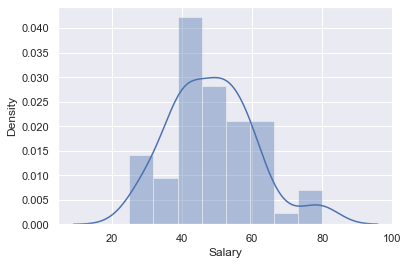

In [67]:
sns.distplot(df1['Salary'],kde=True);

In [68]:
m = df1['Salary'].mean()
m

48.54838709677419

In [69]:
df1['Salary'].median()

50.0

In [70]:
sd = df1['Salary'].std()
sd

12.080912216337277

In [71]:
df1['Salary'].mode()

0    40.0
dtype: float64

Same here but we can see the mean here and judging by the graph most of the point's are around our mean that is 48.55. hence,it follow's a normal distribution.

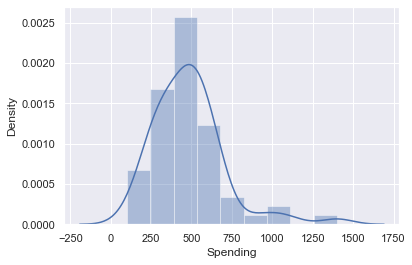

In [73]:
sns.distplot(df1['Spending'],kde=True);

In [74]:
m = df1['Spending'].mean()
m

482.01612903225805

In [75]:
df1['Spending'].median()

500.0

In [76]:
sd = df1['Spending'].std()
sd

221.95380496596204

In [77]:
df1['Spending'].mode()

0    500
dtype: int64

Here, just by seeing the graph which is left skewed we automatically know that it doesn't follow normal distribution

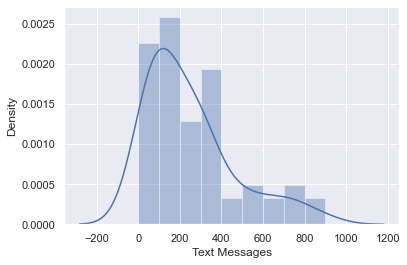

In [79]:
sns.distplot(df1['Text Messages'],kde=True);

In [80]:
m = df1['Text Messages'].mean()
m

246.20967741935485

In [81]:
df1['Text Messages'].median()

200.0

In [82]:
sd = df1['Text Messages'].std()
sd

214.4659503026961

In [83]:
df1['Text Messages'].mode()

0    300
dtype: int64

Same here we can see that the graph is left skewed hence it doesn't follow normal distribution

# 2.8.2 Write a note summarizing your conclusions

### Conclusion = From this we can see or can find out about Each value of the dataset and about the population and can also find all the related answer to the queries regarding Male and Female so by clearing the data it becomes easy for us to take a decision or to the probability of every value present in the dataset. 

# A+&+B+shingles

In [85]:
ss = pd.read_csv('A+&+B+shingles.csv')
ss.head(10)

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37
5,0.24,0.18
6,0.16,0.42
7,0.20,0.58
8,0.20,0.25
9,0.20,0.41


In [86]:
ss.isnull().sum()

A    0
B    5
dtype: int64

In [87]:
ss.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
A,36.0,0.316667,0.135731,0.13,0.2075,0.29,0.3925,0.72
B,31.0,0.273548,0.137296,0.10,0.1600,0.23,0.4000,0.58


In [88]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       36 non-null     float64
 1   B       31 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


# 3.1 Do you think there is evidence that mean moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

For the A shingles, the null and alternative hypothesis to test whether the population mean moisture content is less than 0.35 pound per 100 square feet is:

𝐻0≤0.35



𝐻1>0.35

Since pvalue > 0.05, do not reject H0 . There is not enough evidence to conclude that the mean moisture content for Sample A shingles is less than 0.35 pounds per 100 square feet. p-value = 0.0748. If the population mean moisture content is in fact no less than 0.35 pounds per 100 square feet, the probability of observing a sample of 36 shingles that will result in a sample mean moisture content of 0.3167 pounds per 100 square feet or less is .0748.

In [89]:
t_statistic, p_value = ttest_1samp(ss.A, 0.35)
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value/2))

One sample t test 
t statistic: -1.4735046253382782 p value: 0.07477633144907513 


For the B shingles, the null and alternative hypothesis to test whether the population mean moisture content is less than 0.35 pound per 100 square feet is:

𝐻0≤0.35



𝐻1>0.35




Since pvalue < 0.05, reject H0 . There is enough evidence to conclude that the mean moisture content for Sample B shingles is not less than 0.35 pounds per 100 square feet. p-value = 0.0021. If the population mean moisture content is in fact no less than 0.35pounds per 100 square feet, the probability of observing a sample of 31 shingles that will result in a sample mean moisture content of 0.2735 pounds per 100 square feet or less is .0021.

In [90]:
t_statistic, p_value = ttest_1samp(ss.B, 0.35,nan_policy='omit' )
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value/2))

One sample t test 
t statistic: -3.1003313069986995 p value: 0.0020904774003191826 


# 3.2 Do you think that the population means for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

H0 : μ(A)= μ(B)  

Ha : μ(A)!= μ(B)  

α = 0.05 

As the pvalue > α , do not reject H0; and we can say that population mean for shingles A and B are equal Test Assumptions When running a two-sample t-test, the basic assumptions are that the distributions of the two populations are normal, and that the variances of the two distributions are the same. If those assumptions are not likely to be met, another testing procedure could be use.

In [91]:
t_statistic,p_value=ttest_ind(ss['A'],ss['B'],nan_policy='omit')  

print("t_statistic={} and pvalue={}".format(round(t_statistic,3),round(p_value,3)))

t_statistic=1.29 and pvalue=0.202
